In [91]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

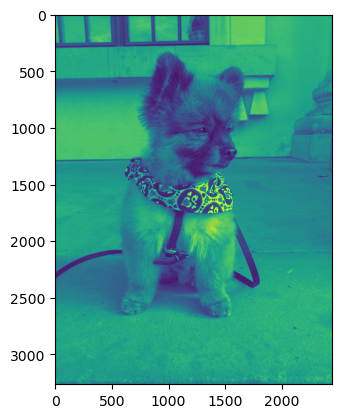

In [92]:
doggy = cv.imread("doggy.jpg")
# cvtColor - смена цветового пространства с BGR на GRAY
plt.imshow(cv.cvtColor(doggy, cv.COLOR_BGR2GRAY))
plt.show()

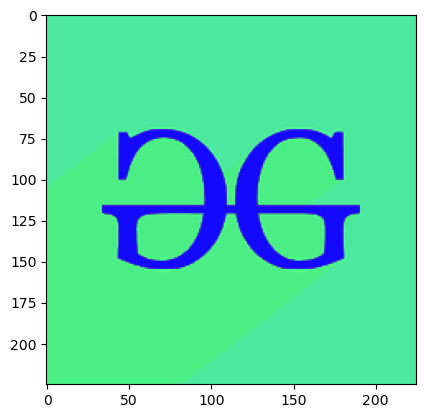

In [93]:
geeks = cv.imread("geeks.png")
# cvtColor - смена цветового пространства с BGR на HSV
image = cv.cvtColor(geeks, cv.COLOR_BGR2HSV)
plt.imshow(image)
plt.show()

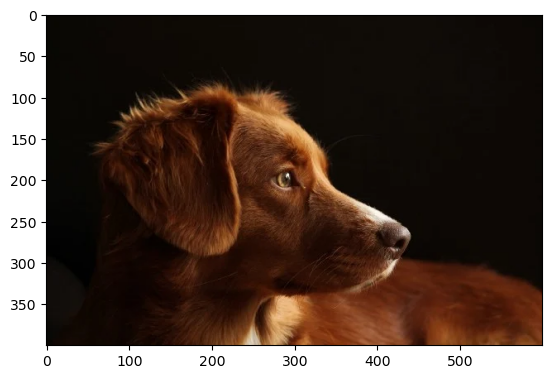

In [94]:
dog = cv.imread("dog.jpg")
plt.imshow(cv.cvtColor(dog, cv.COLOR_BGR2RGB))
plt.show()

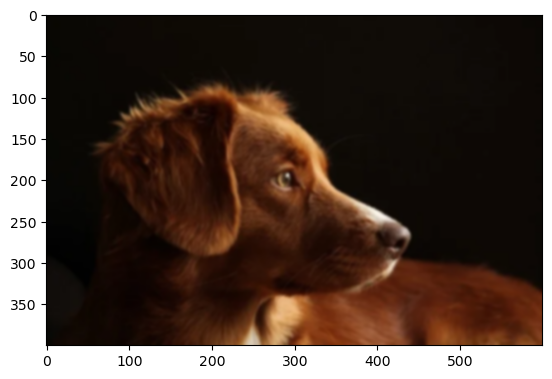

In [95]:
# Исходное изображение.
#Кортеж из 2 положительных нечётных чисел. Чем больше числа, тем больше сила сглаживания.
#sigmaX и sigmaY. Если эти параметры оставить равными 0, то их значение будет рассчитано автоматически.
blurred = cv.GaussianBlur(dog, (7, 7), 0)
plt.imshow(cv.cvtColor(blurredDog, cv.COLOR_BGR2RGB))
plt.show()

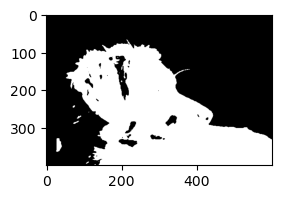

Dice =  0.9240121580547113


In [209]:
grayDog = cv.cvtColor(blurredDog, cv.COLOR_BGR2GRAY)
_, maskForDog = cv.threshold(grayDog, 15, 255, type=cv.THRESH_BINARY)
plt.subplot(121)
plt.imshow(maskForDog, cmap='gray')
plt.show()
ownMaskDog = cv.imread("ownMaskDog.jpg")
_, threshmaskDog = cv.threshold(cv.cvtColor(ownMaskDog, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY)
diceDog = np.sum(maskForDog[threshmaskDog==255])*2 / (np.sum(maskForDog) + np.sum(threshmaskDog))
print('Dice = ', diceDog)

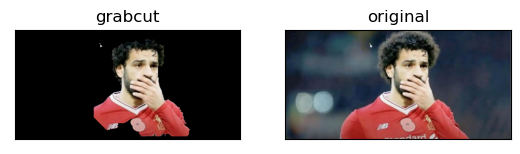

In [99]:
salah  =cv.imread('salah.jpg')
mask =np.zeros(img.shape[:2],np.uint8) 
 
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
 
rect =(300,30,421,378)
cv.grabCut(salah,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT) 
 
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
salah  = salah*mask2[:,:,np.newaxis] 
 
plt.subplot(121)  
plt.imshow(cv.cvtColor(salah,cv.COLOR_BGR2RGB))
plt.title("grabcut"),plt.xticks([]),plt.yticks([])
plt.subplot(122),
plt.imshow(cv.cvtColor(cv.imread('salah.jpg'),cv.COLOR_BGR2RGB))
plt.title("original"),plt.xticks([]),plt.yticks([])  
plt.show()

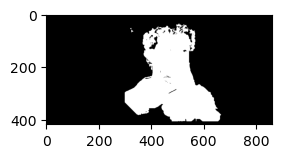

Dice =  0.843157314865822


In [103]:
_, maskForSalah = cv.threshold(cv.cvtColor(salah, cv.COLOR_BGR2GRAY), 10, 255, type=cv.THRESH_BINARY)
plt.subplot(121)
plt.imshow(maskForSalah, cmap='gray')
plt.show()
ownMaskSalah = cv.imread("ownMaskSalah.jpg")
_, threshmaskSalah = cv.threshold(cv.cvtColor(ownMaskSalah, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY)
diceSalah = np.sum(maskForSalah[threshmaskSalah==255])*2 / (np.sum(maskForSalah) + np.sum(threshmaskSalah))
print('Dice = ', diceSalah)

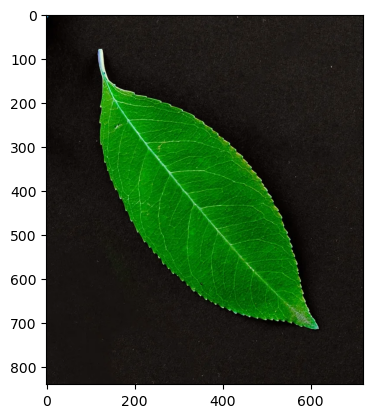

In [138]:
leaf = cv.imread('leaf.jpg')
plt.imshow(leaf)


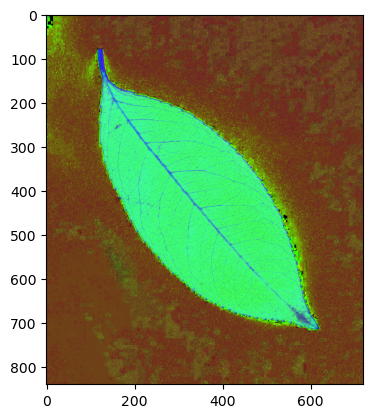

In [139]:
hsv_leaf = cv.cvtColor(leaf, cv.COLOR_BGR2HSV)
plt.imshow(hsv_leaf)

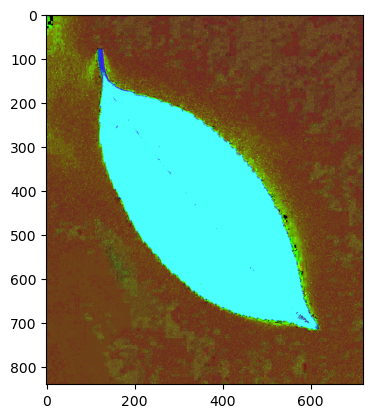

In [140]:
green_low = np.array([45, 100, 50])
green_high = np.array([75, 255, 255])
curr_mask = cv.inRange(hsv_leaf, green_low, green_high)
hsv_leaf[curr_mask > 0] = ([75,255,255])
plt.imshow(hsv_leaf)

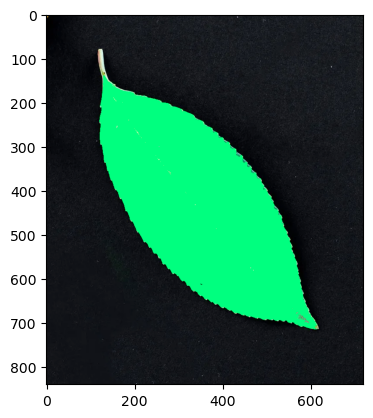

In [141]:
RGB_again = cv.cvtColor(hsv_leaf, cv.COLOR_HSV2RGB)
plt.imshow(RGB_again)

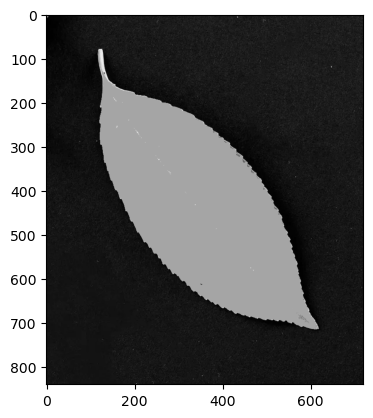

In [142]:
grayLeaf = cv.cvtColor(RGB_again,cv.COLOR_RGB2GRAY)
plt.imshow(grayLeaf, cmap='gray')

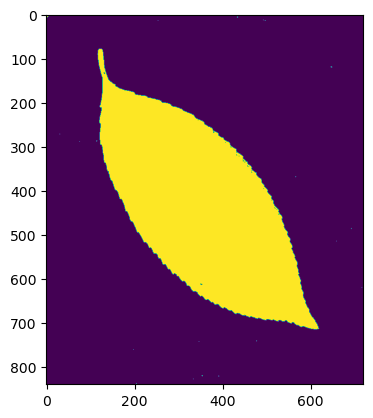

In [143]:
ret, threshold = cv.threshold(grayLeaf, 90, 255, 0)
plt.imshow(threshold)

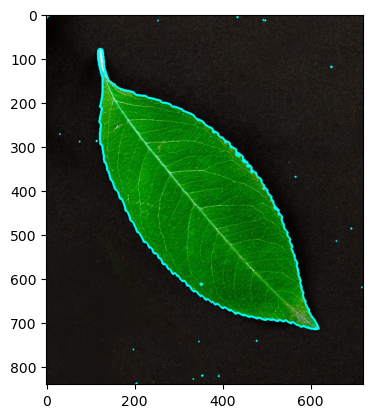

In [136]:
contours, hierarchy = cv.findContours(threshold,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(leaf, contours, -1, (0, 255, 255), 3)
plt.imshow(leaf)

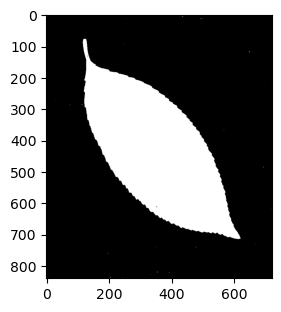

Dice =  0.9505373144947175


In [158]:
_, maskForLeaf = cv.threshold(grayLeaf, 80, 255, type=cv.THRESH_BINARY)
plt.subplot(121)
plt.imshow(maskForLeaf, cmap='gray')
plt.show()
ownMaskLeaf = cv.imread("ownMaskLeaf.jpg")
_, threshmaskLeaf = cv.threshold(cv.cvtColor(ownMaskLeaf, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY)
diceLeaf = np.sum(maskForLeaf[threshmaskLeaf==255])*2 / (np.sum(maskForLeaf) + np.sum(threshmaskLeaf))
print('Dice = ', diceLeaf)

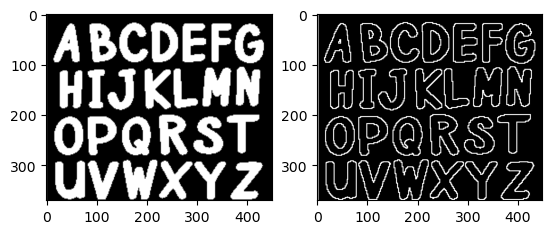

In [174]:
#Morphological operations based on OpenCV are as follows:
#Erosion,Dilation,Opening,Closing,Morphological Gradient,Top hat,Black hat
#Morphological Gradient
img = cv.imread('alphabet.jpg',0)  
# binarize the image
_,binr = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)  
# define the kernel
kernel = np.ones((3, 3), np.uint8)  
# invert the image
invert = cv.bitwise_not(binr)  
# use morph gradient
morph_gradient = cv.morphologyEx(invert,cv.MORPH_GRADIENT,kernel)  
# print the output
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(morph_gradient, cmap='gray')

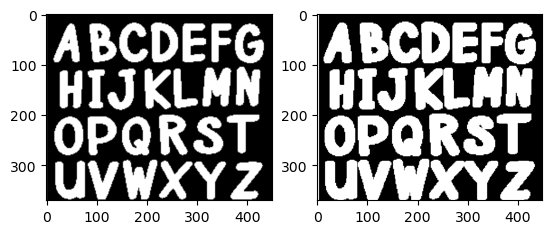

In [206]:
img = cv.imread('alphabet.jpg',0)  
# binarize the image
_,binr = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
# define the kernel
kernel = np.ones((3, 3), np.uint8)  
# invert the image
#invert = cv.bitwise_not(binr)  
# dilate the image
dilation = cv.dilate(binr, kernel, iterations=2) 
# print the output
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(dilation, cmap='gray')

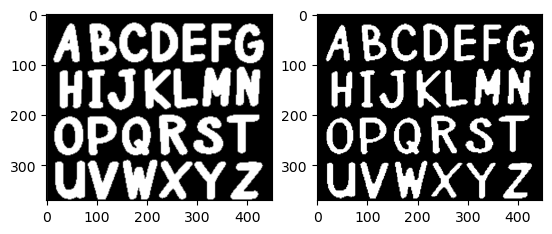

In [202]:
# read the image
img = cv.imread('alphabet.jpg', 0)
  
# binarize the image
binr = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((5, 5), np.uint8)  
  
# erode the image
erosion = cv.erode(binr, kernel,
                    iterations=1)
  
# print the output
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(erosion, cmap='gray')